<a href="https://colab.research.google.com/gist/ankojubhanuprakash/f330b17ba6fc2ad95bfdba5fdb9cc806/reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
import numpy as np
import math
from IPython.display import clear_output
import copy
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
#from numba import jit
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from scipy import stats


# Q1.  Without using any third-party libraries or toolboxes, write code to 

### (a) take any three variable Boolean function as input
(b) generate training examples for this Boolean function
(c) train a neural network to learn this Boolean function, and
(d) verify that the function has been learned, for five separate Boolean functions. 
 #  Neural Network Details.
 input Layer - 7 nodes corresponding input and function
 hidden layer_1 - 5 nodes.
 hidden layer_2 - 3 nodes
 output layer - 1 node   


In [ ]:
def bin_func(a,b,c,d):
  #print(d)
  if d == -2:
    return int(a and b and c)
  elif d==-1:
    return int(a or b or c)
  elif d==0:
    return int((a and b) or c)  
  elif d==1:
    return int((a and not b )and not c)
  elif d==2: 
      return int((not a or not b) and not c) 

possible_combinations = []
for i in range(2):
  for j in range(2):
    for k in range(2):
      for fun in np.arange(-2,3,1):
        possible_combinations.append([i,j,k,int(fun)])

bin_df=pd.DataFrame([
    [row[0],row[1],row[2],row[3],bin_func(row[0],row[1],row[2],row[3])]
    for row in possible_combinations
  ],columns = ['a','b','c','label','output'])

bin_df[['label_-1'	,'label_0'	,'label_1'	,'label_2']]=pd.get_dummies(bin_df['label'],prefix='label',drop_first=True)
bin_df.drop('label',axis=1,inplace=True)
bin_df = bin_df.sample(frac=1)
bin_df.reset_index(drop=True,inplace=True)
bin_df.sample(8)


,a,b,c,output,label_-1,label_0,label_1,label_2
33,1,0,0,1,0,0,0,1
0,1,0,1,0,0,0,0,1
37,0,0,0,0,1,0,0,0
1,1,0,1,1,0,1,0,0
15,1,0,0,1,1,0,0,0
39,1,0,0,1,0,0,1,0
12,0,1,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0


## Train and Test details

In [ ]:
# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)

def train(epochs,x,y):
  # randomly initialize our weights with mean 0
  alpha=2
  synapse_0 = 2*np.random.random((7,5)) - 1
  synapse_1 = 2*np.random.random((5,3)) - 1
  synapse_2 = 2*np.random.random((3,1)) - 1
  for i in range(epochs): 
    layer_0 = x
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))
    layer_2 = sigmoid(np.dot(layer_1,synapse_1))
    layer_3 = sigmoid(np.dot(layer_2,synapse_2))
    #print(layer_0,layer_1) 
    #print(type(layer_2),layer_2.shape,y.shape)
    #print(layer_2)
    # how much did we miss the target value?
    layer_3_error = layer_3 - y  
    #layer_2_error = layer_2 - y  
    if (i% 5000) == 0:
      print ("Error after "+str(i)+" iterations:" + str(np.mean(np.abs(layer_3_error))))
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    layer_3_delta = layer_3_error*sigmoid_output_to_derivative(layer_3)
    #layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    layer_2_error = layer_3_delta.dot(synapse_2.T)
    layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)
    
    layer_1_error = layer_2_delta.dot(synapse_1.T)
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
    
    synapse_2 -= alpha * (layer_2.T.dot(layer_3_delta))
    synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
    synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))  
  return synapse_0,synapse_1,synapse_2
def test_net(x,synapse_0,synapse_1,synapse_2):
  layer_0 = x
  layer_1 = sigmoid(np.dot(layer_0,synapse_0))
  layer_2 = sigmoid(np.dot(layer_1,synapse_1))
  layer_3 = sigmoid(np.dot(layer_2,synapse_2))
  layer_3 = layer_3>0.5
  return layer_3.astype('int')


In [ ]:
# test train split
x_train,y_train,x_test,y_test  =bin_df.drop('output',axis=1).head(30),bin_df.head(30)['output'],bin_df.drop('output',axis=1).tail(10),bin_df.tail(10)['output'] 
y_train=np.array([[i] for i in y_train])
# train
weights0,weights1,weights2 = train(60000,np.array(x_train),y_train)
# prediction
y_train_pred = test_net(np.array(x_train),weights0,weights1,weights2)
y_test_pred = test_net(np.array(x_test),weights0,weights1,weights2)

Error after 0 iterations:0.514804195941352
Error after 5000 iterations:0.0015377940183932304
Error after 10000 iterations:0.001060468342376578
Error after 15000 iterations:0.0008559270105823132
Error after 20000 iterations:0.0007359600561126802
Error after 25000 iterations:0.0006549247249487272
Error after 30000 iterations:0.0005955387800536046
Error after 35000 iterations:0.0005496364544288565
Error after 40000 iterations:0.0005127959303957043
Error after 45000 iterations:0.00048238853104059994
Error after 50000 iterations:0.0004567412309391925
Error after 55000 iterations:0.0004347321982703302


Train Accuracy


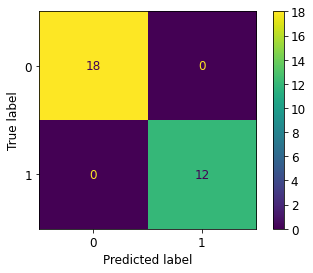

In [283]:
print('Train Accuracy')
cf = confusion_matrix(y_train_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=[0,1])
disp.plot() 


Test Accuracy


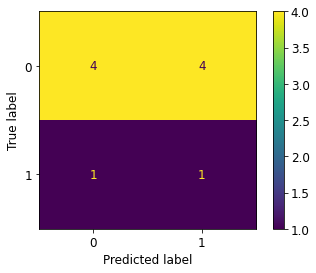

In [ ]:
print('Test Accuracy')
cf = confusion_matrix(y_test_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=[0,1])
disp.plot()


## Q2. (40 points) Without using any third-party libraries or toolboxes, write code to

# a. TestBench - a random instance of the frozen lake scenario, with the size of the lake (N) assuming its square, and the number of holes (M).

In [ ]:
def initialise_Map(size,num_holes):
  mapcount = 0
  while True :
    mapcount+=1
    #print(mapcount) 
    Map = np.full((size,size), 'F')
    Map[0][0] = 'O'
    Map[size-1][size-1] = 'G'
    #generate holes
    hole_list = []
    count = 0

    while count < num_holes:
      
      #print(hole_list)
      temp = np.random.choice([ _ for _ in range(2,(size**2))],1,replace=False)
      #print(temp)
      if  temp not in hole_list:
        count = count+1
        hole_list.append(temp)
        Map[int((temp-1)/size)][((temp-1)%size)] = 'H'
    #check route exists
    iterlist = [[0,0]]
    visitedlist = []
    exists = False
    #print('red')
    while len(iterlist)>0:
      #print(Map)
      #print(iterlist)
      firstitem = iterlist[0]
      bx,by = firstitem[0],firstitem[1]
      if Map[bx][by] == 'G':
        exists = True
        break
      elif Map[bx][by]=='F'or Map[bx][by] == 'O':
        head = []
        if bx+1<size and by+1<size:
          if [bx+1,by] not in visitedlist:
            head.append([bx+1,by])
          if [bx,by+1] not in visitedlist:
            head.append([bx,by+1])
        elif bx+1<size:
          if [bx+1,by] not in visitedlist:
            head.append([bx+1,by])
        elif by+1<size:  
          if [bx,by+1] not in visitedlist:
            head.append([bx,by+1])
          
        iterlist = head+iterlist[1:]
      else:
        iterlist = iterlist[1:]  
    if exists:
      break
     
  return Map,hole_list
      
#
def render_env(env_Map,new_state,player_state,size):
  #clear_output()
  if player_state !=None and new_state != None:
    newx,newy,oldx,oldy= new_state[0],new_state[1],player_state[0],player_state[1]  
    tempi = env_Map[newx][newy]
    env_Map[newx][newy] = 'O'
    env_Map[oldx][oldy] = 'F'
  map_str = '|'
  for i in range(size):
    for j in range(size):
      map_str=map_str+env_Map[i][j]+'|'
      #break
      #break
    map_str = map_str+'\n'+'|'
  print(map_str[:-1])
  #env_Map[newx][newy] = tempi
  #env_Map[oldx][oldy] = 'O'
  #return env_Map  


def Map_reset(size,holelist):
  env_Map = []
  env_Map = np.full((size,size), 'F')
  env_Map[0][0] = 'O'
  env_Map[size-1][size-1] = 'G'
  for temp in holelist:
    env_Map[int((temp-1)/size)][((temp-1)%size)] = 'H'
  return env_Map  

#size = int(input('enter size of lake-'))
#num_holes = int(input('enter number of holes-'))
#print('Map size is '+ str(size)+' with '+str(num_holes)+' of holes.')
print('Goal_reward is 100 and Hole Reward is -100' )
#print(Action_space)

  


Goal_reward is 100 and Hole Reward is -100


# (b) implement a Q-learning agent to find a path through the lake to the goal. Report the results of the learning algorithm by plotting episode count on the x-axis and total reward received by the agent within an episode on the y-axis 

In [ ]:
q_table = []

#print(Action_space)
def destroy_q(size):
  ## initialise q with zeroes
  global q_table 
  restricted_up =[ [0,i] for i in range(size) ]
  restricted_down= [ [size-1,i] for i in range(size) ]
  restricted_left =[ [i,0] for i in range(size) ] 
  restricted_right =[ [i,size-1] for i in range(size) ] 
  q_table = np.zeros(shape=([size]*2 + [4]))
  index_list = [ _ for _ in range(size)]
  for i in range(size):
    for j in range(size):
      for action in range(4):
        if action == 0 and [i,j] in restricted_left :
          q_table[i][j][action] = -math.inf
        if  action == 1 and [i,j] in restricted_right:
          q_table[i][j][action] = -math.inf
        if  action==2 and [i,j] in restricted_up:  
          q_table[i][j][action] = -math.inf
        if  action == 3 and [i,j] in restricted_down:
          q_table[i][j][action] = -math.inf 
def get_action_perform(env_Map,player_state,epsilon):
  Goal_reward = 1000
  Hole_reward = -1000
  x = player_state[0]
  y = player_state[1]
  restricted_up =[ [0,i] for i in range(size) ]
  restricted_down= [ [size-1,i] for i in range(size) ]
  restricted_left =[ [i,0] for i in range(size) ] 
  restricted_right =[ [i,size-1] for i in range(size) ] 
  reward = -10
  if np.random.random() > epsilon:
    # GET THE ACTION
    action = np.argmax(q_table[x][y])
  else:
    while True:
      action = np.random.randint(0, 4)
      if action == 0 and [x,y] not in restricted_left:
        break
      if action == 1 and [x,y] not in restricted_right:
        break
      if action == 2 and [x,y] not in restricted_up:
        break
      if action == 3 and [x,y] not in restricted_down:
        break
      if q_table[x][y][action] != -math.inf:
        break
  #print(q_table[x][y][action],x,y,action)      
  if action == 0:
    y=y-1#left
  elif action == 1 :
    y=y+1#right
  elif action == 2 :
    x=x-1#up
  elif action == 3 :
    x=x+1   #down
  if env_Map[x][y] == 'H':
    reward = Hole_reward
  elif env_Map[x][y] == 'G' :
    reward = Goal_reward
    #print(env_Map)  
  return [x,y],action,reward
def play_game(p_l_rate,p_discount,p_no_epi,p_show_flag,p_epsilon,p_eps_decay,size,num_holes ):
  Original_Map,holelist = initialise_Map(size,num_holes)
  #print(Original_Map)
  env_Map = Map_reset(size,holelist)  
  Goal_reward = 1000
  Hole_reward = -1000
  Action_space = {0:'Left',1:'Right',2:'Up',3:'Down'}
  destroy_q(size)
  #wait=input('hi')
  LEARNING_RATE =p_l_rate# 0.1
  DISCOUNT = p_discount#0.95
  EPISODES = p_no_epi#5000
  SHOW_EVERY = 100
  epsilon = p_epsilon#0.9
  EPS_DECAY = p_eps_decay#0.9998  # Every episode will be epsilon*EPS_DECAY
  # q_table
  global q_table
  #episode
  episode_rewards = []
  for episode in range(EPISODES):
    path = []
    #if episode% SHOW_EVERY ==0 and p_show_flag:
      #print(f"on #{episode}, epsilon is {epsilon}")
      #print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
      #time.sleep(1)
      #show = True
    #else:
    #  show = False
    episode_reward = 0
    #Initialise player
    env_Map = Map_reset(size,holelist) 
    player_state = [0,0]
    #if episode%1000 == 0:
    #  print(env_Map)
    
    for i in range(200):
      path.append(player_state)
      #print(player_state)
      # choose an action for possible state
      new_state,action,reward=get_action_perform(env_Map,player_state,epsilon)
      max_future_q = np.max(q_table[new_state[0]][new_state[1]])
      current_q = q_table[player_state[0]][player_state[1]][action]
      if reward == Goal_reward:
        new_q =  Goal_reward
        path.append(new_state)
      else :
        new_q = (1-LEARNING_RATE)*current_q + LEARNING_RATE * ( reward + DISCOUNT * max_future_q)  
              
      q_table[player_state[0]][player_state[1]][action] = new_q
      player_state = new_state
      episode_reward += reward
      if reward == Goal_reward  or reward == Hole_reward:
            break  
    episode_rewards.append(episode_reward)
    epsilon*= EPS_DECAY   
  #print("game over")
  if p_show_flag:
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(8)
    plt.xlabel('Episode Count')
    plt.ylabel('Episode Total Reward')
    plt.title('Grid Size - ' +str(size)+ ' Holes -'+str(num_holes)+'  Alpha - '+str(lr)+'  Lambda -'+str(dscnt)+' Initial Epsilon '+str(init_eps)+'Epsilon decay value'+str(EPS_DECAY))
    plt.plot([_ for _ in range(len(episode_rewards))],episode_rewards)
    plt.show()
    #print(Original_Map)
    render_env(Original_Map,None,None,size)
    #print('Epsilon decay value is '+str(EPS_DECAY))
    print("Latest epsilon value is "+str(epsilon))  
    print("path to reach goal")
    print(path) 
  ##print(len(path))
  return path,episode_rewards
  #print(Original_Map)    

   

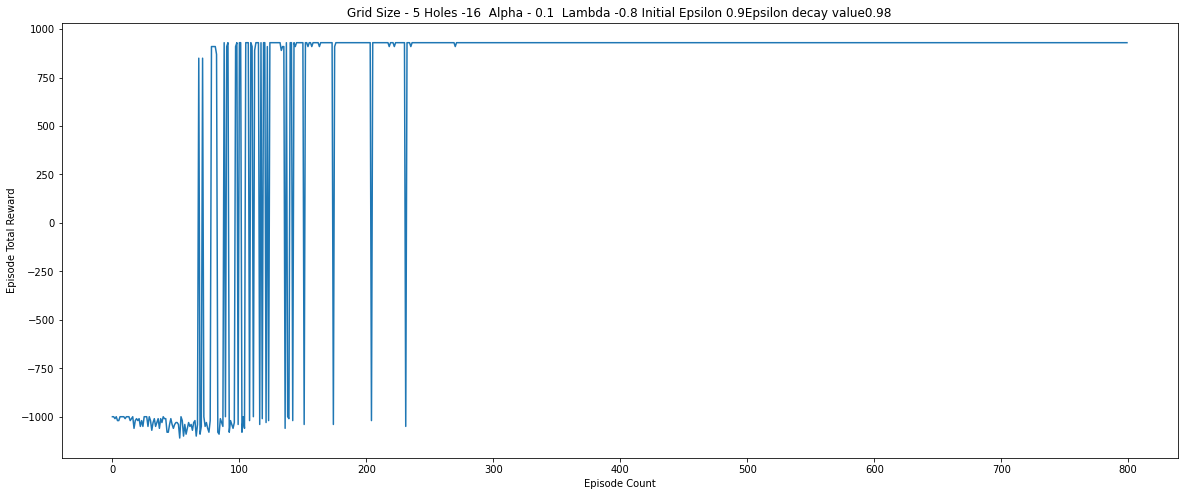

|O|F|H|H|H|
|H|F|H|H|H|
|H|F|H|H|H|
|H|F|H|H|H|
|H|F|F|F|G|

Latest epsilon value is 8.611981008639173e-08
path to reach goal
[[0, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [4, 2], [4, 3], [4, 4]]


In [ ]:
size=5
num_holes=16
lr = 0.1
dscnt = 0.8
init_eps = 0.9
eps_decay = 0.98
path,episode_rewards=play_game(lr,dscnt,800,True,init_eps,eps_decay,size,num_holes )


# (c) Changes in learning performance with respect to the parameters α and λ in your algorithm.

# Observations from graph.
### 1. With increase in Learning rate and discount rate, agent quickly converges to the goal. possible reason could be the more weightage is given to future upcoming rewards, so agent able to learn to reach goal and constarints to take  shorter paths and hence quickly coverges to optimal path. 
### 2.  It is observed from the graph that, as number of holes increases for a given grid size, number of steps to converge to a optimal Q also increases. And samw with the grid size that is as grid size increases, the number of steps to converge also increases. it is beacuse the increase in complexity need more number of steps to converge.


learning performance with respect to the parameters α


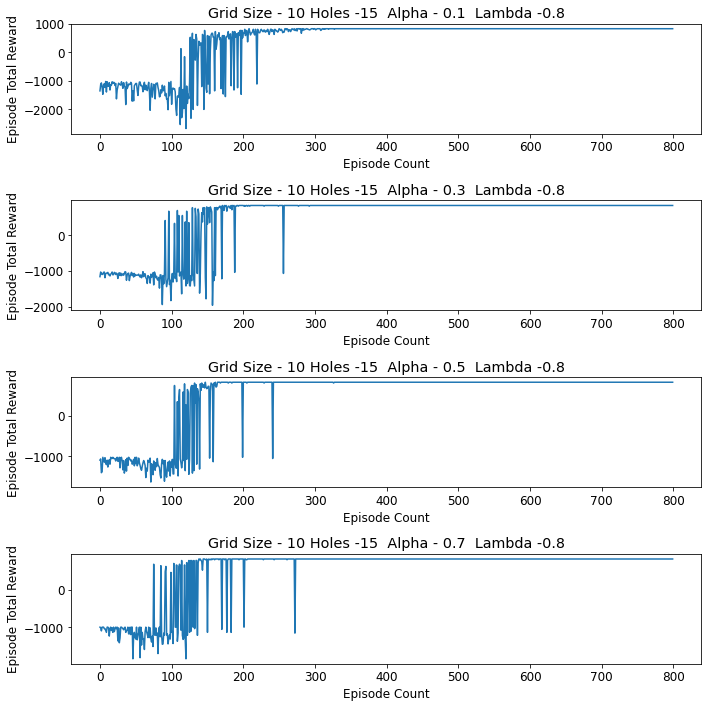

In [ ]:
alpha_i = np.arange(0.1,0.8,0.2)
#alpha_i = [0.1,0.2]
discount =np.arange(0.2,0.9,0.05)
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(len(alpha_i))
#fig.suptitle('learning performance with respect to the parameters α')
for i in range(len(alpha_i)):
  size=10
  num_holes=15
  lr = round(alpha_i[i],2)
  dscnt = 0.8
  init_eps = 0.9
  eps_decay = 0.98
  path,episode_rewards=play_game(lr,dscnt,800,False,init_eps,eps_decay,size,num_holes )
  axs[i].set_title('Grid Size - ' +str(size)+ ' Holes -'+str(num_holes)+'  Alpha - '+str(lr)+'  Lambda -'+str(dscnt))#+' Initial Epsilon '+str(init_eps)+'Epsilon decay value'+str(eps_decay))
  axs[i].set_xlabel('Episode Count')
  axs[i].set_ylabel('Episode Total Reward')
  axs[i].plot([_ for _ in range(len(episode_rewards))],episode_rewards)


fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout() 
print('learning performance with respect to the parameters α')
plt.show()

learning performance with respect to the parameters λ


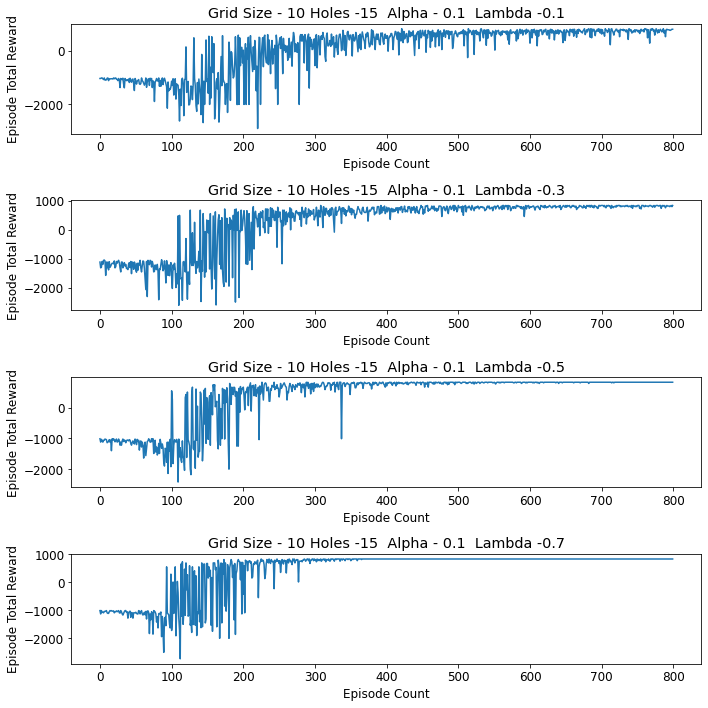

In [ ]:
#alpha_i = np.arange(0.1,0.8,0.2)
#alpha_i = [0.1,0.2]
discount_i =np.arange(0.1,0.9,0.2)
fig, axs = plt.subplots(len(discount_i ))
#fig.suptitle('learning performance with respect to the parameters α')
for i in range(len(discount_i )):
  size=10
  num_holes=15
  lr = 0.1
  dscnt = round(discount_i[i],2) 
  init_eps = 0.9
  eps_decay = 0.98
  path,episode_rewards=play_game(lr,dscnt,800,False,init_eps,eps_decay,size,num_holes )
  axs[i].set_title('Grid Size - ' +str(size)+ ' Holes -'+str(num_holes)+'  Alpha - '+str(lr)+'  Lambda -'+str(dscnt))#+' Initial Epsilon '+str(init_eps)+'Epsilon decay value'+str(eps_decay))
  axs[i].set_xlabel('Episode Count')
  axs[i].set_ylabel('Episode Total Reward')
  axs[i].plot([_ for _ in range(len(episode_rewards))],episode_rewards)


fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout() 
print('learning performance with respect to the parameters λ')
plt.show()

# (d) Changes in learning performance with respect to the Grid size and number of holes.


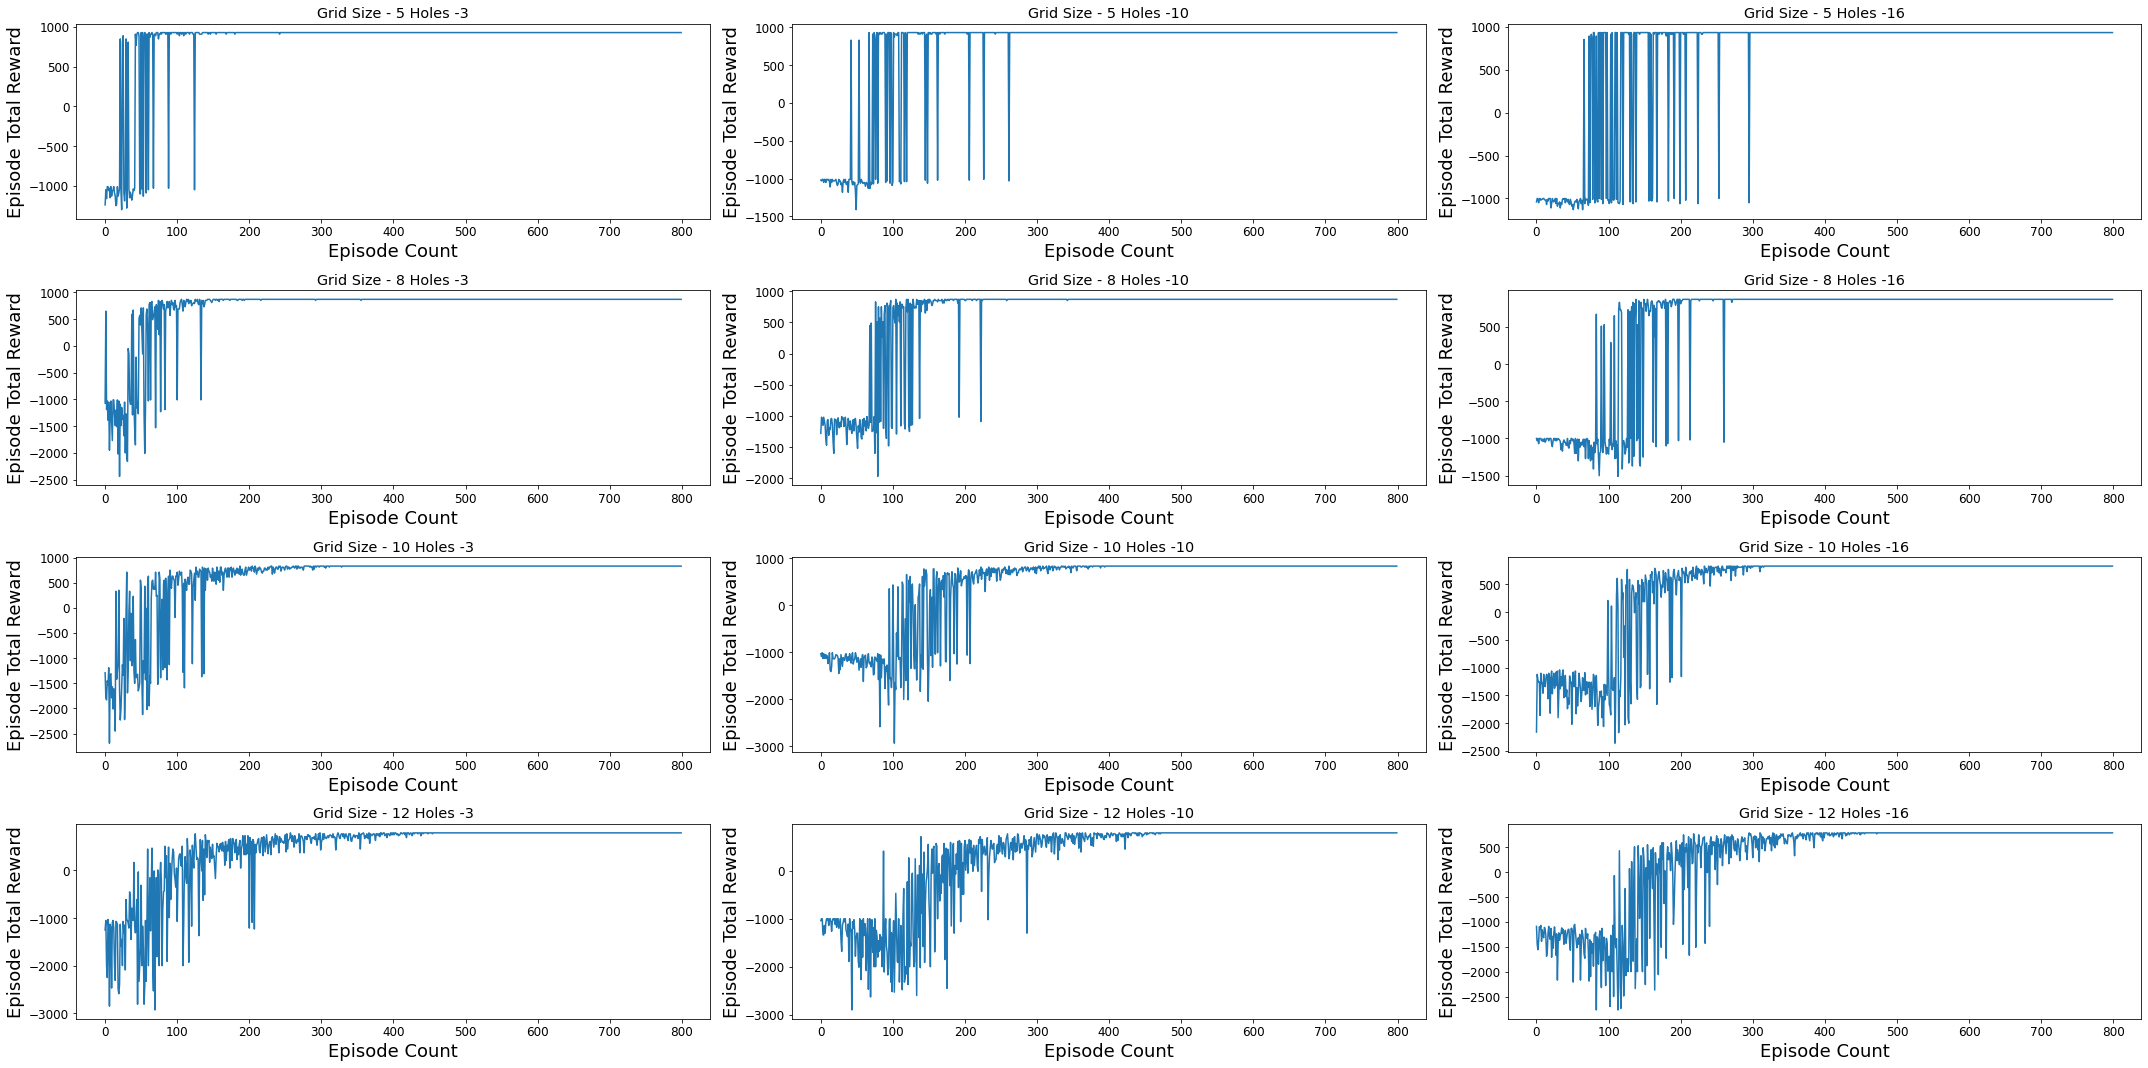

In [ ]:
size_i = [5,8,10,12]
hole_i = [3,10,16]
fig, axs = plt.subplots(len(size_i),len(hole_i))
#plt.rcParams.update({'font.size': 15})

for i in range(len(size_i)):
  for  j in range(len(hole_i)) :
    size=size_i[i]
    num_holes=hole_i[j]
    lr = 0.1
    dscnt = 0.8
    init_eps = 0.9
    eps_decay = 0.98
    path,episode_rewards=play_game(lr,dscnt,800,False,init_eps,eps_decay,size,num_holes )
    axs[i, j].set_title('Grid Size - ' +str(size)+ ' Holes -'+str(num_holes))#+'  Alpha - '+str(lr)+'  Lambda -'+str(dscnt)+' Initial Epsilon '+str(init_eps)+'Epsilon decay value'+str(eps_decay))
    axs[i, j].set_xlabel('Episode Count',fontsize=18)
    axs[i, j].set_ylabel('Episode Total Reward',fontsize=18)
    axs[i, j].plot([_ for _ in range(len(episode_rewards))],episode_rewards)

fig.set_figheight(15)
fig.set_figwidth(30)
fig.tight_layout() 
plt.show()


## Q3.  The Rulkov map is a simple dynamical systems model of neuronal action potentials.
### 𝑥𝑛+1 = 𝑓(𝑥𝑛, 𝑦𝑛)
𝑦𝑛+1 = 𝑦𝑛 − 𝜇 (𝑥𝑛 + 1) + 𝜇 * sigma.

simulation of Silence, Tonic and Burst spiking

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


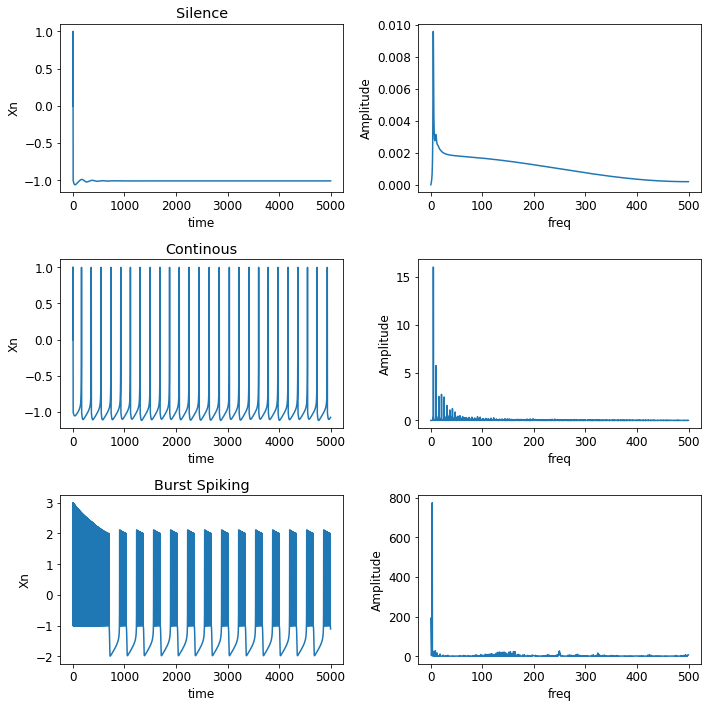

In [287]:
def computeff(x,n):
  fhat = np.fft.fft(x_list,n)
  PSD = fhat * np.conj(fhat) / n
  freq = (1/(dt*n))*np.arange(n)
  l= np.arange(1,np.floor(n/2),dtype='int')
  #plt.plot(freq[l],PSD[l])
  #print(l)
  #print(PSD[l])

  return PSD[l],freq[l]

def f(x,y,alpha):
    if x<=0:
        return (alpha/(1-x))+y
    elif 0<x<(alpha+y):
        return alpha+y
    elif x>=(alpha+y):
        return -1
def evolve_set(t,dt,alpha,sigma,mu):
  x=0
  y=-3
  #dt = 0.001
  #t = np.arange(0,5,dt)
  x_list=[0]
  y_list=[0]
  for _ in t:
    x_new=f(x,y,alpha)
    y_new=y-mu*(x+1)+mu*sigma
    x_list.append(x_new)
    y_list.append(y_new)
    x=x_new
    y=y_new
  return x_list

parameter_set = [[4,-0.01,'Silence'],[4,0.01,'Continous'],[6,-0.1,'Burst Spiking']]  
tempx = []
fig, axs = plt.subplots(3,2)      
for i in range(len(parameter_set)):
  mu=0.001  
  alpha = parameter_set[i][0]
  sigma = parameter_set[i][1]  
  dt = 0.001
  t = np.arange(0,5,dt)
  n=len(t)
  x_list = evolve_set(t,dt,alpha,sigma,mu) 
  PSDI,freqi = computeff(x_list,n)
  #PSDI = computeff(x_list,n)
  #print(np.max(PSDI))
  #tempx.append(x_list)    
  axs[i,0].set_title(parameter_set[i][2])#+' Initial Epsilon '+str(init_eps)+'Epsilon decay value'+str(eps_decay))
  axs[i,0].set_xlabel('time')
  axs[i,0].set_ylabel('Xn')
  axs[i,1].set_xlabel('freq')
  axs[i,1].set_ylabel('Amplitude')
  axs[i ,0].plot(np.linspace(0,n,n+1),x_list)  
  axs[i, 1].plot(freqi,PSDI)


fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout() 

plt.show()



##  ranges of parameter values that govern these three different regimes of activity for the neuron model. 

In [398]:
sigma_i = np.arange(-1,1,0.2)
misc=[]
alpha_i = np.arange(2,8,2  )
mu_i = np.arange(0.001,0.01,0.0005)
parameterlist = []
for i in range(len(sigma_i)):
  for  j in range(len(alpha_i)) :
    for ll in mu_i:
      parameterlist.append([sigma_i[i],alpha_i[j],ll])
silence,tonic,burst = [],[],[]
k=0
for par in parameterlist:
  sigma = round(par[0],2)
  alpha = round(par[1],2)
  mu = round(par[2],4)
  #print(mu)
  dt = 0.001
  t = np.arange(0,5,dt)
  n=len(t)
  x_list = evolve_set(t,dt,alpha,sigma,mu) 
  PSDI,freqi = computeff(x_list,n)# compute fourier transform to get domianant frequencies
  if k <160:
    silence.append([sigma,alpha,mu])
  elif k<260 and k>=160:
    if np.max(PSDI)>220:
      burst.append([sigma,alpha,mu])
    else:
      silence.append([sigma,alpha,mu])  
  else:
    if  np.max(PSDI)>370 or k in range(415,432):    
      burst.append([sigma,alpha,mu])
    elif k in range(270,289)or k in range(324,343) or k in (378,397):
      silence.append([sigma,alpha,mu])  
    elif k in range(289,307) or k in range(343,361) or k in range(397,415) or k>=432:
      tonic.append([sigma,alpha,mu])  
    else:
      silence.append([sigma,alpha,mu])
      #print(k) 
  k+=1

silence_pd = pd.DataFrame(silence)
silence_pd.columns = ['sigma','alpha','mu']
silence_pd['label'] = 0
tonic_pd = pd.DataFrame(tonic)
tonic_pd.columns = ['sigma','alpha','mu']
tonic_pd['label'] = 1
burst_pd = pd.DataFrame(burst)
burst_pd.columns = ['sigma','alpha','mu']
burst_pd['label'] = 2
frames = [silence_pd, tonic_pd, burst_pd]

final_df = pd.concat(frames)

Red region - Bursting spikes ,  Green region - Contionous spikes , Blue region - silence


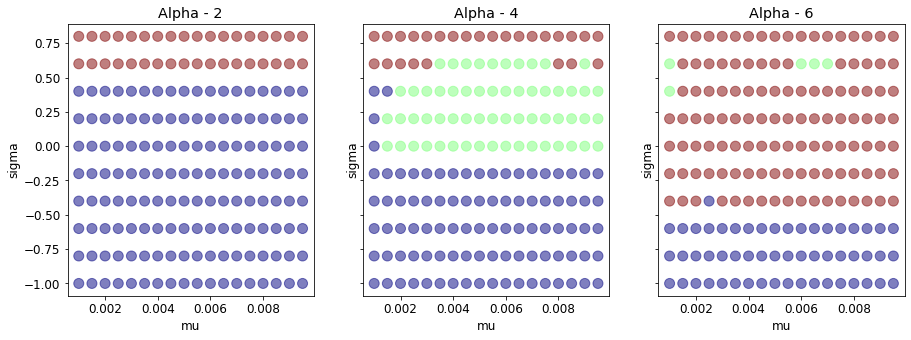

In [416]:
print('Red region - Bursting spikes ,  Green region - Contionous spikes , Blue region - silence')
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fig.suptitle('Heat Map for paramter ranges')
i = 0


for alphax in alpha_i:
  temp_data = final_df.loc[(final_df['alpha']==alphax),['mu','sigma','label']]
  scatter = axes[i].scatter(temp_data['mu'],temp_data['sigma'],c=temp_data['label'],alpha=0.5,cmap=plt.get_cmap("jet"),s=100,)
  axes[i].set_title('Alpha - '+str(alphax))#parameter_set[i][2])#+' Initial Epsilon '+str(init_eps)+'Epsilon decay value'+str(eps_decay))
  axes[i].set_xlabel('mu')
  axes[i].set_ylabel('sigma')
  i=i+1

plt.show()

### sample and relevant plots, insights to classify spking regions based on dominant frequecnues were drawn from below graphs.

(203.02973292235504+0j)
(61.84901230707225+0j)
(40.55165137356508+0j)
(28.533473400461727+0j)
(21.13012033969567+0j)
(16.261059902681748+0j)
(12.893500731435784+0j)
(10.469988112698031+0j)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

(8.668939085119495+0j)
(7.294573982342794+0j)
(6.222290516469972+0j)
(5.369781837783507+0j)
(4.116443354254151+0j)
(3.648114576662034+0j)
(3.25530758473725+0j)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

(2.922631006561237+0j)
(268.59116984428533+0j)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


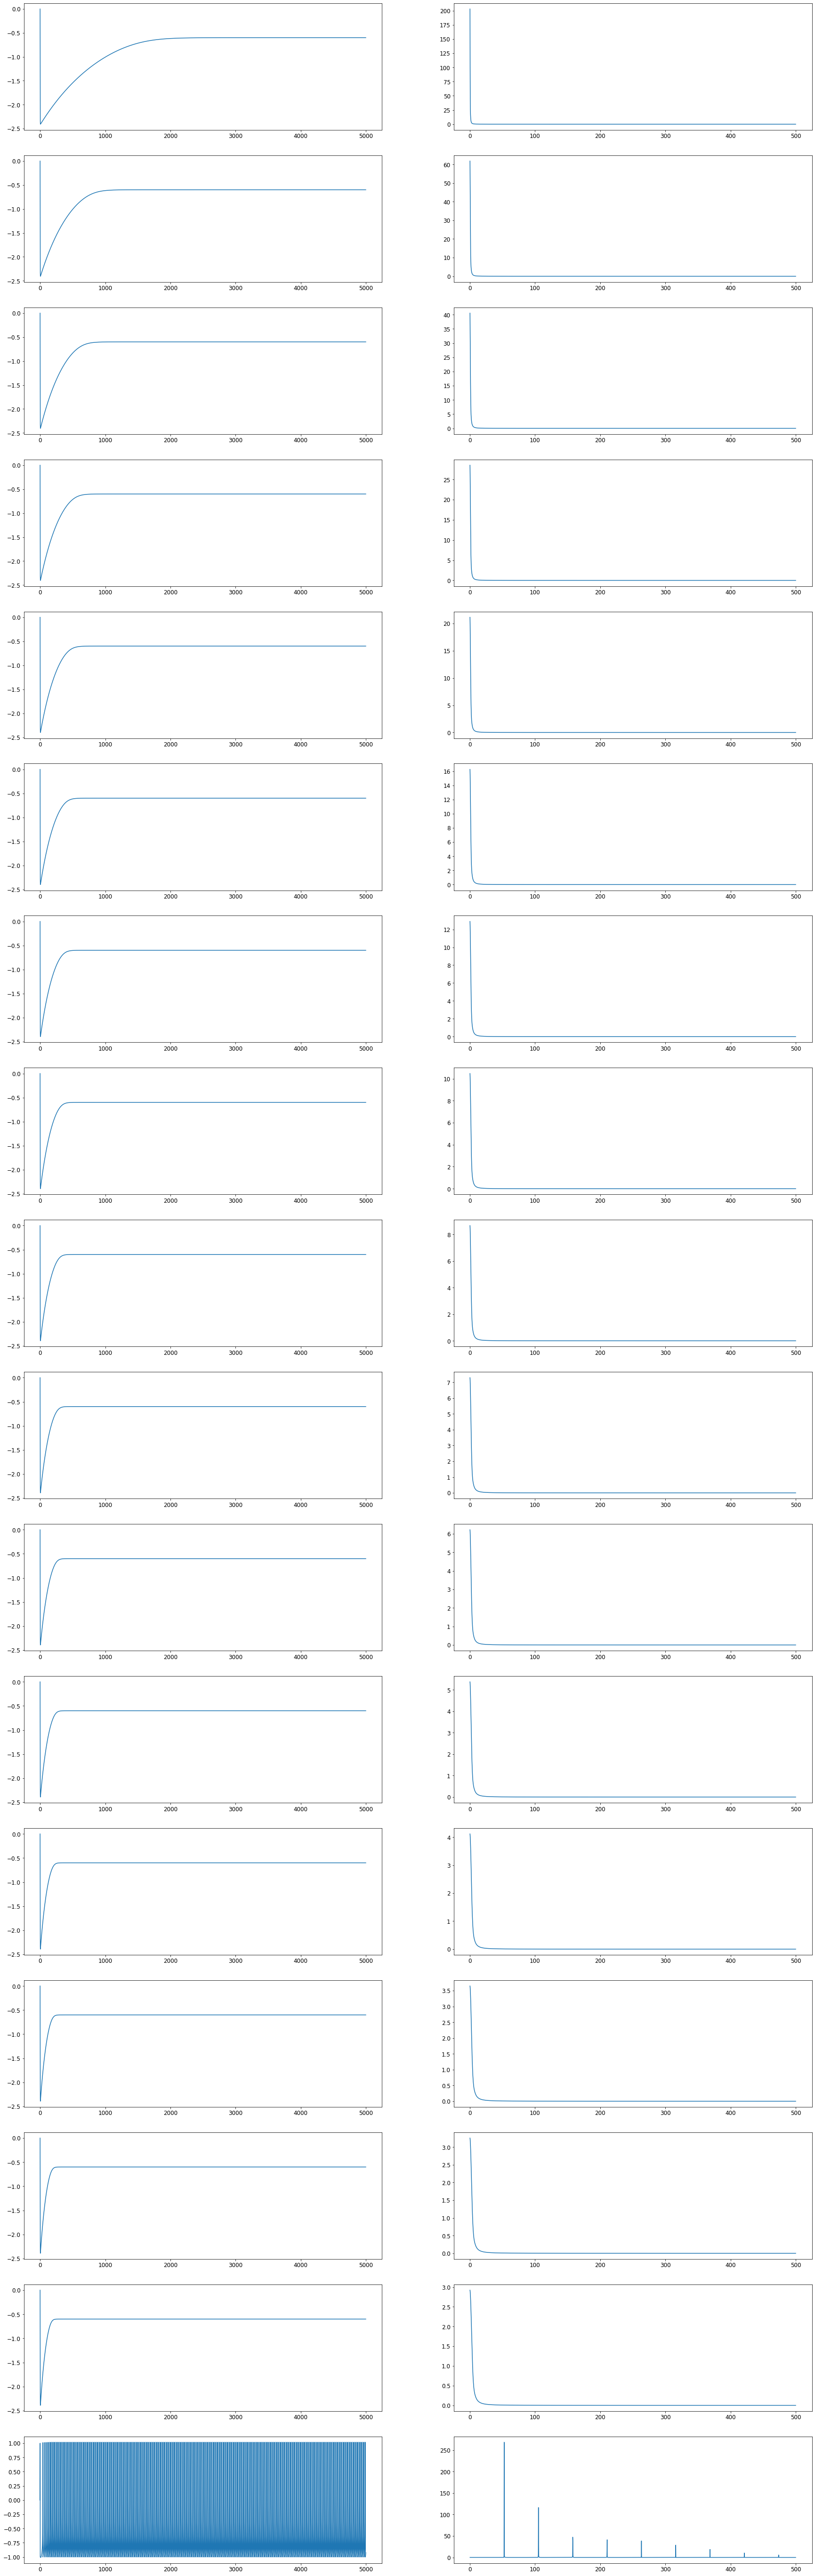

In [396]:
k=0
fig, axs = plt.subplots(len(misc),2)   
for par in misc:
  sigma = par[0]
  alpha = par[1]
  mu = par[2]
  dt = 0.001
  t = np.arange(0,5,dt)
  n=len(t)
  x_list = evolve_set(t,dt,alpha,sigma,mu) 
  PSDI,freqi = computeff(x_list,n)
  print(np.max(PSDI))
  #axs[i, j].set_xlabel('Episode Count',fontsize=18)
  #axs[i, j].set_ylabel('Episode Total Reward',fontsize=18)
  axs[k, 0].plot(np.linspace(0,n,n+1),x_list)
  axs[k, 1].plot(freqi,PSDI)
  k+=1

fig.set_figheight(100)
fig.set_figwidth(30)
#fig.tight_layout() 
plt.show()